<a href="https://colab.research.google.com/github/VojtasekP/NAEX-pendulum/blob/main/01naex_hw01_pendulum_Vendula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX Project 01 - Pendulum study

Add your team name(s), members, and roles here (optional).

## Research Task

Design and run an experiment to investigate which factors affect the period of a simple pendulum. For small release angles, classical theory predicts the period T depends only on the string length L:

$T \approx 2*\pi*\sqrt{\frac{L}{g}} \ \ \text{for} \ \ |\theta| <= 10\text{deg}$

https://en.wikipedia.org/wiki/Pendulum_(mechanics)

That is, for small angles the period should be independent of the bob's weight (mass) and approximately independent of angle. Your goal is to build an experiment that confirms that weight is not a significant factor, while verifying the expected length effect. You may optionally probe how well the "small-angle" approximation holds by using a couple of small angle levels.

- Response variable: period T (seconds). Recommended protocol: time $N$ swings with a stopwatch and use $T = t_N / N$ to reduce reaction-time error.
- Primary factors:
  - Length $L$ (quantitative, choose >= 3 levels across your feasible range)
  - Weight $m$ (mass of the bob; choose 2-3 levels). Theory: no effect on $T$.
  - Release angle $\theta$ (small angles: e.g., 5, 10, 20 degrees; choose >= 2 levels to test the approximation)
- Optional nuisance/structure: operator (person), day/session, string type, pivot, ambient conditions. You may treat these as blocks or ignore them if you control them sufficiently.

You decide whether to randomize run order, include operators, blocking, or repeated measurements - justify your choices using **design of experiments reasoning**.

## Design Guidance

- Target the physics regime where the small-angle approximation is valid $(|\theta| \leq 10 deg)$. If you exceed this, discuss the implications.
- Plan replicates/repeated measurements to mitigate stopwatch error (e.g., 3 repeats per treatment or average of 10-20 swings per timing).
- If multiple operators participate, consider blocking by operator or using a mixed-effects model.
- Randomize run order if practical; if not, explain how you controlled time-related drift.
- Record all factor levels and the run order for traceability.
- Power: Aim for $\beta \leq 0.1$  to detect a 0.1s change in T between mass levels at $\alpha = 0.05$. Use a pilot SD (e.g., from 10 swings) to size the study.

## Submission

Submit by the deadline in PDF, Rmd, or ipynb (Python or R). Include raw data (I prefer a link to the data in the code) and your analysis code with outputs. Ensure the report is self-contained and reproducible.

## Tasks / Questions

1) Planning and design
- Define your factors and levels ($L$, $m$, $\theta$) and any nuisance variables (operators, sessions, etc.).
- Specify the response and the measurement protocol ($N$ swings per timing, repeats per treatment, instrumentation, units).
- State whether you will randomize or block; justify your choices.

2) Power and sample size (pre-study)
- Using a pilot SD (or a reasonable assumption), estimate how many replicates per treatment you need to achieve 80% power to detect a 2-3% change in $T$ between mass levels at $\alpha = 0.05$. State assumptions clearly.

3) Data collection and quality
- Report the full data table (with run order if randomized) and basic summaries (mean, SD) by factor level.
- Visualize the data (e.g., boxplots and mean+/-SE) across $L$, $m$, and $\theta$.

4) Primary analysis - ANOVA
- Fit an ANOVA model for $T$ with factors $L$, $m$, $\theta$. Consider interactions only if justified by design.
- Test and interpret the effect of weight $m$. Report F, df, and p-values.

5) ANOVA - multiple comparison (Tukey, LSD)
- Find out if there is significant difference in means between different levels of $L$, $m$, $\theta$.
- Can we confirm the assumption that the mass of the blob does not matter?
- Can we confirm the assumption that a small angle has no effect on the time T , but a larger one does?

6) Assumptions and diagnostics
- Provide residual plots (QQ-plot, residuals vs fitted, ...) and formal tests where relevant. Discuss any deviations and remedies.
- Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).

7) Post-study power/reflection
- Based on the observed SD and estimates, re-calc the achieved power of the test in the ANOVA for different lenghts of ropes and corresponding measuremnts and other factors.
- Assume the difference in T we want to detect is 0.1s. Calculate the number of repetition needed for the power of the resulting test to be greater than 0.9.

8) Alternative model - regression with quantitative factors
- Fit a regression with T ~ sqrt(L) (or log T vs 0.5 log L) and include theta (as small quantitative) and m. Compare conclusions about m.
- Choose model with significant variables.

9) Conclusions
- Summarize whether the data support the theoretical result (T depends on L; m not significant at small angles). Provide a minimal recommended design that would convincingly demonstrate this in future labs.

10) (Optional) Estimate $g$
- Use your best model to estimate $g$ and provide an interval. Compare to 9.81 $m/s^2$.


### 1) Planning and design

**Experiment**
-------------------
* For measuring the angular deflection was used formula tg θ
* We defined N=5 swings per timing with 3 repeats per treatment
* Three operators measured time by stopwatch on the phone
* Overall, 81 measurements were performed

**Factors**
---------------
* Length (L) - 3 levels: 33 cm, 65,5 cm, 120 cm
* Weight (m) - 3 levels: 77 g, 139 g, 220 g
* Angle (θ) - 3 levels: 5 °, 10 ° 20 °



### 2) Power and sample size (pre-study)

### 3) Data collection and quality

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/VojtasekP/NAEX-pendulum/refs/heads/main/NAEX_pendulum.csv"
data = pd.read_csv(url)
print(data.head())
print("---------------------------------------------------------------------------------")
print(data.describe())


      L   m  angle  time_Sab  time_Flo  time_avg  period
0  65.5  77      5      8.06      8.10     8.080   1.616
1  65.5  77     10      8.24      8.23     8.235   1.647
2  65.5  77     20      8.19      8.23     8.210   1.642
3  33.0  77      5      5.83      5.26     5.545   1.109
4  33.0  77     10      5.88      6.00     5.940   1.188
---------------------------------------------------------------------------------
                L           m      angle   time_Sab   time_Flo   time_avg  \
count   27.000000   27.000000  27.000000  27.000000  27.000000  27.000000   
mean    72.833333  145.333333  11.666667   8.358519   8.326296   8.342407   
std     36.577894   59.666380   6.354889   2.172763   2.227633   2.197652   
min     33.000000   77.000000   5.000000   5.690000   5.260000   5.515000   
25%     33.000000   77.000000   5.000000   5.890000   5.945000   5.917500   
50%     65.500000  139.000000  10.000000   8.160000   8.150000   8.140000   
75%    120.000000  220.000000  20.000

In [2]:
T = data['period']
L= data['L']
m = data['m']
θ = data['angle']

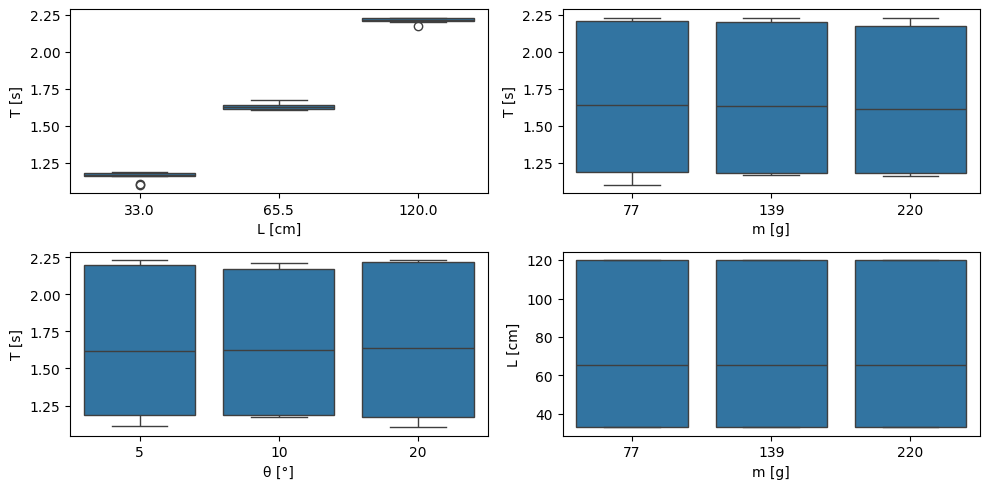

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.boxplot(x=L, y=T, ax=axes[0, 0])
axes[0,0].set_xlabel("L [cm]")
axes[0,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=T, ax=axes[0,1])
axes[0,1].set_xlabel("m [g]")
axes[0,1].set_ylabel("T [s]")

sns.boxplot(x=θ, y=T, ax=axes[1, 0])
axes[1,0].set_xlabel("θ [°]")
axes[1,0].set_ylabel("T [s]")

sns.boxplot(x=m, y=L, ax=axes[1,1])
axes[1,1].set_xlabel("m [g]")
axes[1,1].set_ylabel("L [cm]")

plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# assuming you already have:
# T = data['period'], L = data['L'], m = data['m'], θ = data['angle']
# all columns are in `data`

# full table with run order if randomized
data = data.reset_index().rename(columns={'index': 'run_order'})
print(data.head())

# summaries by each factor
summary_L = data.groupby('L')['period'].agg(['mean', 'std']).reset_index()
summary_m = data.groupby('m')['period'].agg(['mean', 'std']).reset_index()
summary_theta = data.groupby('angle')['period'].agg(['mean', 'std']).reset_index()

print("\nSummary by L:\n", summary_L)
print("\nSummary by m:\n", summary_m)
print("\nSummary by θ:\n", summary_theta)


   run_order     L   m  angle  time_Sab  time_Flo  time_avg  period
0          0  65.5  77      5      8.06      8.10     8.080   1.616
1          1  65.5  77     10      8.24      8.23     8.235   1.647
2          2  65.5  77     20      8.19      8.23     8.210   1.642
3          3  33.0  77      5      5.83      5.26     5.545   1.109
4          4  33.0  77     10      5.88      6.00     5.940   1.188

Summary by L:
        L      mean       std
0   33.0  1.160111  0.031711
1   65.5  1.632111  0.021351
2  120.0  2.213222  0.018089

Summary by m:
      m      mean       std
0   77  1.661889  0.470522
1  139  1.678556  0.451492
2  220  1.665000  0.449939

Summary by θ:
    angle      mean       std
0      5  1.669000  0.462582
1     10  1.670556  0.441573
2     20  1.665889  0.467841


### 4) Primary analysis - ANOVA

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Make sure categorical factors are coded correctly
data['L'] = data['L'].astype('category')
data['m'] = data['m'].astype('category')
data['angle'] = data['angle'].astype('category')


In [6]:
# additive model (no interactions)
model = smf.ols('period ~ C(L) + C(m) + C(angle)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type II for balanced designs
print(anova_table)

            sum_sq    df            F        PR(>F)
C(L)      5.008551   2.0  3914.743168  1.153155e-26
C(m)      0.001414   2.0     1.104910  3.506305e-01
C(angle)  0.000102   2.0     0.079435  9.239280e-01
Residual  0.012794  20.0          NaN           NaN


In [7]:
F_m = anova_table.loc['C(m)', 'F']
df_m = (anova_table.loc['C(m)', 'df'], anova_table.loc['Residual', 'df'])
p_m = anova_table.loc['C(m)', 'PR(>F)']

print(f"Effect of mass m: F({df_m[0]:.0f}, {df_m[1]:.0f}) = {F_m:.3f}, p = {p_m:.4f}")


Effect of mass m: F(2, 20) = 1.105, p = 0.3506


### 5) Tukey, LSD

In [8]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_angle = pairwise_tukeyhsd(data['period'], data['angle'])
print(tukey_angle)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5     10   0.0016    1.0  -0.537 0.5401  False
     5     20  -0.0031 0.9999 -0.5417 0.5354  False
    10     20  -0.0047 0.9997 -0.5432 0.5339  False
---------------------------------------------------


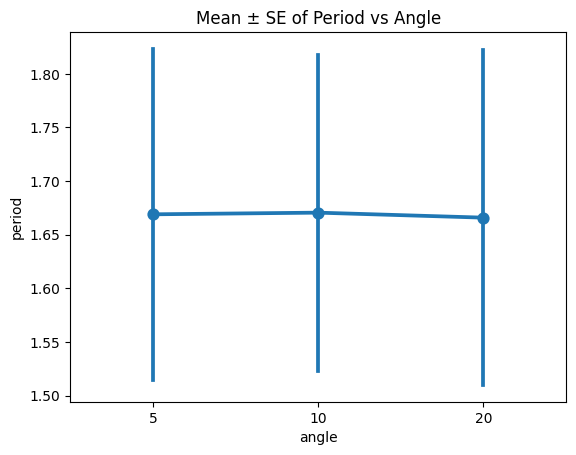

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x='angle', y='period', data=data, errorbar='se')
plt.title('Mean ± SE of Period vs Angle')
plt.show()


In [15]:
model_int = smf.ols('period ~ C(L)*C(angle) + C(m)', data=data).fit()
sm.stats.anova_lm(model_int, typ=2)

,sum_sq,df,F,PR(>F)
C(L),5.008551,2.0,4099.893524,2.069028e-22
C(angle),0.000102,2.0,0.083192,9.205700e-01
C(m),0.001414,2.0,1.157167,3.393367e-01
C(L):C(angle),0.003021,4.0,1.236478,3.349010e-01
Residual,0.009773,16.0,NaN,NaN


### 6) Assumptions and diagnostics

In [33]:
# additive model just lenght
model_sig = smf.ols('period ~ C(L)', data=data).fit()
anova_table_1 = sm.stats.anova_lm(model_sig, typ=2)  # Type II for balanced designs
print(anova_table_1)
print(model_sig.summary())

            sum_sq    df            F        PR(>F)
C(L)      5.008551   2.0  4200.238787  2.857717e-31
Residual  0.014309  24.0          NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                 period   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4200.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):           2.86e-31
Time:                        21:32:22   Log-Likelihood:                 63.515
No. Observations:                  27   AIC:                            -121.0
Df Residuals:                      24   BIC:                            -117.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>

In [35]:
resid = model_sig.resid
fitted = model_sig.fittedvalues

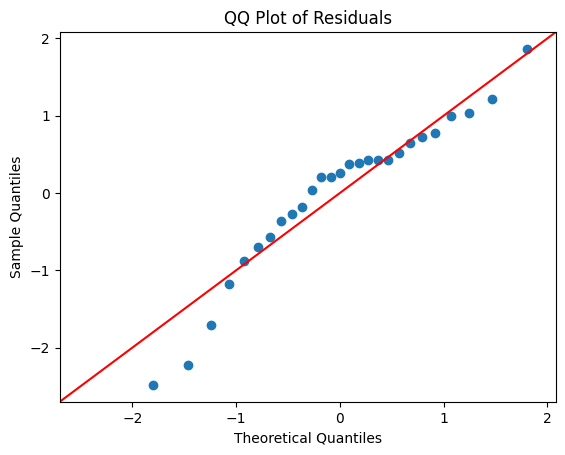

In [36]:
sm.qqplot(resid, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()


In [37]:
from scipy import stats
# --- Shapiro-Wilk test ---
shapiro_stat, shapiro_p = stats.shapiro(resid)
print(f"Shapiro–Wilk Test:")
print(f"  Statistic = {shapiro_stat:.3f}")
print(f"  p-value   = {shapiro_p:.3f}")

Shapiro–Wilk Test:
  Statistic = 0.935
  p-value   = 0.091


QQ plot and Shapiro-Wilk test do not reject hypothesis, that residuals are normally distributed.

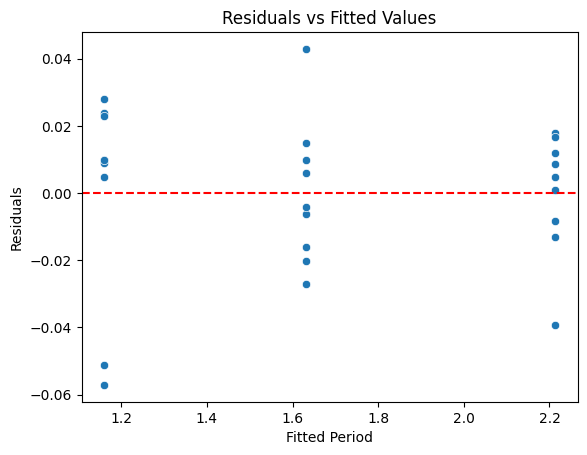

In [38]:
sns.scatterplot(x=fitted, y=resid)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Period')
plt.ylabel('Residuals')
plt.show()


We can see two outliers which were probably caused by human mistake, because the measurement for shorter length was more dificult. Apart from that we can say that the residuals are homoscadastic.

### 7) Post-study power/reflection

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import FTestAnovaPower
from collections import Counter

# ---------- helpers ----------
def pooled_within_sd(y, groups):
    """Pooled within-group SD for a one-way factor."""
    df = pd.DataFrame({'y': y, 'g': groups})
    ss_within = 0.0
    n_total = 0
    k = df['g'].nunique()
    for _, sub in df.groupby('g'):
        n_i = len(sub)
        if n_i < 2:
            continue
        ss_within += ((sub['y'] - sub['y'].mean())**2).sum()
        n_total += n_i
    df_within = n_total - k
    return np.sqrt(ss_within / df_within)

def cohens_f_from_means(means, sd_within, ns=None):
    """
    Cohen's f for one-way ANOVA from group means and pooled within SD.
    ns: list/array of group sizes; if None assume equal groups.
    """
    means = np.asarray(means, dtype=float)
    k = len(means)
    if ns is None:
        p = np.ones(k) / k
    else:
        ns = np.asarray(ns, dtype=float)
        p = ns / ns.sum()
    mu = np.sum(p * means)
    sigma_m2 = np.sum(p * (means - mu)**2)          # variance of group means (prob-weighted)
    return np.sqrt(sigma_m2 / (sd_within**2))

def achieved_power_oneway(y, groups, alpha=0.05):
    """
    Achieved power for a one-way ANOVA on factor 'groups' given data y.
    Uses observed group means and pooled within SD. Assumes equal n per group
    when passing to the power function (standard in statsmodels).
    """
    y = np.asarray(y, dtype=float)
    groups = pd.Series(groups)
    k = groups.nunique()

    # group stats
    means = groups.groupby(groups).apply(lambda g: y[g.index].mean()).values
    sd_w = pooled_within_sd(y, groups)

    # Cohen's f
    f = cohens_f_from_means(means, sd_w)

    # n per group (rounded down to be conservative)
    counts = groups.value_counts().sort_index().values
    n_per_group = counts.min()

    # achieved power
    power = FTestAnovaPower().power(effect_size=f, k_groups=k, nobs=n_per_group, alpha=alpha)
    return dict(k=k, n_per_group=int(n_per_group), sd_within=sd_w, f=f, power=power)

def required_n_for_delta(sd_within, k, delta=0.1, alpha=0.05, target_power=0.9, scenario='conservative'):
    """
    Map a target detectable difference Δ to Cohen's f and solve n per group.

    scenario:
      - 'conservative': only two levels differ by Δ, others equal
            f = Δ / (sqrt(2k) * sd_within)
      - 'linear': means linearly span range Δ across k levels
            f = (Δ / sd_within) * sqrt((k + 1) / (12 * (k - 1)))
    """
    if scenario == 'conservative':
        f = delta / (np.sqrt(2 * k) * sd_within)
    elif scenario == 'linear':
        f = (delta / sd_within) * np.sqrt((k + 1) / (12 * (k - 1)))
    else:
        raise ValueError("scenario must be 'conservative' or 'linear'")

    n_needed = FTestAnovaPower().solve_power(effect_size=f, k_groups=k,
                                             power=target_power, alpha=alpha)
    # round up: repetitions per level
    return int(np.ceil(n_needed)), f

# ---------- run it for each factor ----------
# Assume your DataFrame is named `data` with columns: 'period', 'L', 'm', 'angle'
alpha = 0.05
delta = 0.1
target_power = 0.9

# Achieved power with current data
res_L = achieved_power_oneway(data['period'], data['L'], alpha=alpha)
res_m = achieved_power_oneway(data['period'], data['m'], alpha=alpha)
res_theta = achieved_power_oneway(data['period'], data['angle'], alpha=alpha)

print("ACHIEVED POWER (observed effect sizes)")
print(f"L:     k={res_L['k']}, n/level={res_L['n_per_group']}, sd_within={res_L['sd_within']:.4f}, f={res_L['f']:.3f}, power={res_L['power']:.3f}")
print(f"m:     k={res_m['k']}, n/level={res_m['n_per_group']}, sd_within={res_m['sd_within']:.4f}, f={res_m['f']:.3f}, power={res_m['power']:.3f}")
print(f"angle: k={res_theta['k']}, n/level={res_theta['n_per_group']}, sd_within={res_theta['sd_within']:.4f}, f={res_theta['f']:.3f}, power={res_theta['power']:.3f}")

# Required repetitions per level for Δ = 0.1 s
def solve_required(data, factor, label):
    sdw = pooled_within_sd(data['period'].values, data[factor].values)
    k = data[factor].nunique()
    n_conservative, f_conservative = required_n_for_delta(sdw, k, delta=delta, alpha=alpha,
                                                          target_power=target_power, scenario='conservative')
    n_linear, f_linear = required_n_for_delta(sdw, k, delta=delta, alpha=alpha,
                                              target_power=target_power, scenario='linear')
    print(f"\nREQUIRED n/level to detect Δ={delta:.3f}s with power≥{target_power} at α={alpha}  [{label}]")
    print(f"  conservative (two levels differ): f={f_conservative:.3f}, n/level ≥ {n_conservative}")
    print(f"  linear trend across all k levels: f={f_linear:.3f}, n/level ≥ {n_linear}")

solve_required(data, 'L', 'L')
solve_required(data, 'm', 'm')
solve_required(data, 'angle', 'angle')


ACHIEVED POWER (observed effect sizes)
L:     k=3, n/level=9, sd_within=0.0244, f=17.639, power=1.000
m:     k=3, n/level=9, sd_within=0.4574, f=0.016, power=0.050
angle: k=3, n/level=9, sd_within=0.4575, f=0.004, power=0.050

REQUIRED n/level to detect Δ=0.100s with power≥0.9 at α=0.05  [L]
  conservative (two levels differ): f=1.672, n/level ≥ 9
  linear trend across all k levels: f=1.672, n/level ≥ 9

REQUIRED n/level to detect Δ=0.100s with power≥0.9 at α=0.05  [m]
  conservative (two levels differ): f=0.089, n/level ≥ 1592
  linear trend across all k levels: f=0.089, n/level ≥ 1592

REQUIRED n/level to detect Δ=0.100s with power≥0.9 at α=0.05  [angle]
  conservative (two levels differ): f=0.089, n/level ≥ 1592
  linear trend across all k levels: f=0.089, n/level ≥ 1592


/tmp/ipython-input-1191630999.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = groups.groupby(groups).apply(lambda g: y[g.index].mean()).values
/tmp/ipython-input-1191630999.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for _, sub in df.groupby('g'):
/tmp/ipython-input-1191630999.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = groups.groupby(groups).apply(lambda g: y[g.index].mean()).value

### 8) Alternative model - regression with quantitative factors

In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# if factors are numeric, ensure correct dtype
data['L'] = pd.to_numeric(data['L'], errors='coerce')
data['m'] = pd.to_numeric(data['m'], errors='coerce')
data['angle'] = pd.to_numeric(data['angle'], errors='coerce')

data['sqrt_L'] = np.sqrt(data['L'])

# model 1: T ~ sqrt(L) + m + angle
model1 = smf.ols('period ~ sqrt_L + m + angle', data=data).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                 period   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2689.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.06e-29
Time:                        09:41:31   Log-Likelihood:                 63.545
No. Observations:                  27   AIC:                            -119.1
Df Residuals:                      23   BIC:                            -113.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.024     -0.050      0.9

In [ ]:
data['log_T'] = 0.5*np.log(data['period'])
data['log_L'] = np.log(data['L'])

model2 = smf.ols('log_T ~ log_L + m + angle', data=data).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                  log_T   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1829.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           1.71e-27
Time:                        09:41:52   Log-Likelihood:                 90.270
No. Observations:                  27   AIC:                            -172.5
Df Residuals:                      23   BIC:                            -167.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8022      0.015    -52.781      0.0

In [ ]:
# drop m if not significant
model3 = smf.ols('period ~ sqrt_L + angle', data=data).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                 period   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4205.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.82e-31
Time:                        09:41:55   Log-Likelihood:                 63.531
No. Observations:                  27   AIC:                            -121.1
Df Residuals:                      24   BIC:                            -117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.021      0.028      0.9

In [ ]:
print(model1.aic, model2.aic, model3.aic)


-119.08944679871149 -172.5405823274201 -121.06287770533106


### 9) Conclusions

### 10) (Optional) Estimate g`

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import t

# 1) prepare
data = data.copy()
data['L'] = pd.to_numeric(data['L'], errors='coerce')        # meters
data['period'] = pd.to_numeric(data['period'], errors='coerce')  # seconds
data['angle'] = pd.to_numeric(data['angle'], errors='coerce')    # degrees or radians; just be consistent

# sqrt(L)
data['sqrt_L'] = np.sqrt(data['L'])

# optional but nice: center angle so beta is slope at ~small-angle regime
data['angle_c'] = data['angle'] - data['angle'].mean()

# 2) fit best model: T ~ sqrt(L) + angle (mass dropped)
mod = smf.ols('period ~ sqrt_L + angle_c', data=data).fit()

# 3) extract beta for sqrt_L and its t-interval
beta = mod.params['sqrt_L']
se = mod.bse['sqrt_L']
df = int(mod.df_resid)
alpha = 0.05
tcrit = t.ppf(1 - alpha/2, df)

beta_lo = beta - tcrit*se
beta_hi = beta + tcrit*se

# 4) transform to g and CI via endpoint transform
# g = (2π / beta)^2 ; monotone decreasing in beta for beta>0
c = (2*np.pi)**2

g_hat = (2*np.pi / beta)**2
g_lo  = (2*np.pi / beta_hi)**2  # note: hi beta -> lower g
g_hi  = (2*np.pi / beta_lo)**2  # and lo beta -> higher g

print("Model summary (so you can judge residuals and p-values):")
print(mod.summary())

print("\nGravity estimate from slope on sqrt(L):")
print(f"beta = {beta:.6f}  (95% CI: {beta_lo:.6f} .. {beta_hi:.6f})")
print(f"g_hat = {g_hat:.4f} m/s^2  (95% CI: {g_lo:.4f} .. {g_hi:.4f})")

# 5) compare to 9.81
g_true = 9.81
diff = g_hat - g_true
rel = diff / g_true * 100
inside = (g_lo <= g_true <= g_hi)
print(f"\nCompare to 9.81 m/s^2:")
print(f"Δ = {diff:+.4f} m/s^2  ({rel:+.2f}%); 9.81 inside CI? {inside}")


Model summary (so you can judge residuals and p-values):
                            OLS Regression Results                            
Dep. Variable:                 period   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4205.
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.82e-31
Time:                        09:43:18   Log-Likelihood:                 63.531
No. Observations:                  27   AIC:                            -121.1
Df Residuals:                      24   BIC:                            -117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------